In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
%matplotlib inline

In [2]:
plt.style.use('ggplot')
np.random.seed(123)

In [13]:
NMC = 500
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)
r = (xmc ** 2 + ymc ** 2) ** 0.5
accept = np.where(r<=1, 1, 0)
accept_ratio = np.sum(accept) / NMC
print(accept_ratio)

0.798


In [16]:
NMC = 2000
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)
@interact(mcs=(0,NMC,1))
def animation(mcs=0):
    plt.figure(figsize=(6,6))
    plt.xlim([0,1])
    plt.ylim([0,1])
    x = np.arange(0,1,0.001)
    y = (1 - x **2) ** 0.5
    y2 = np.ones(x.shape[0])
    plt.plot(x,y)
    plt.fill_between(x, y, alpha=0.3)
    plt.fill_between(x, y, y2, alpha=0.3)
    r = (xmc[:mcs] ** 2 + ymc[:mcs] ** 2) ** 0.5
    accept = np.where(r<=1, 1, 0)
    accept_ratio = np.sum(accept) / mcs
    plt.scatter(xmc[:mcs], ymc[:mcs], color='black', marker='.')
    plt.show()
    print('Monte Carlo: ',accept_ratio)
    print('Analytical Solution: ', np.pi / 4.0)

interactive(children=(IntSlider(value=0, description='mcs', max=2000), Output()), _dom_classes=('widget-intera…

In [10]:
pi_mcs = []
NMC = 2000
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)
for mcs in range(1,NMC):
    r = (xmc[:mcs] ** 2 + ymc[:mcs] ** 2) ** 0.5
    accept = np.where(r<1, 1, 0)
    accept_ratio = np.sum(accept) / mcs
    pi_mcs.append(accept_ratio)

In [11]:
pi_x = np.arange(len(pi_mcs)) + 1

Text(0, 0.5, 'accept ratio')

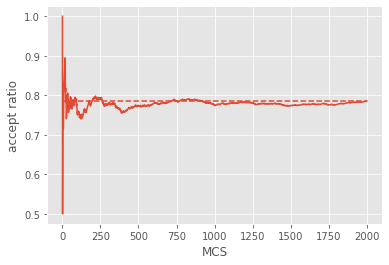

In [12]:
plt.plot(pi_x, pi_mcs)
plt.hlines(0.785, pi_x[0], pi_x[-1], linestyles='dashed')
plt.xlabel('MCS')
plt.ylabel('accept ratio')